In [1]:
%run Functions.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_final_load = pd.read_csv("vacancies_final.csv")

In [3]:
df_final_load

,ID,Кого ищут,Описание,Описание (preProcess),Компания,Город,Страна,"Зарплата, net., ₽",Дата публикации,Тип занятости,Вид дискриминации,Должность
0,114296870,Исполнительный директор,Обязанности: 1. Стратегическое управление. Раз...,"обязанность, стратегический, управление, разра...",Сильный Ресурс,Минск,Беларусь,193727,2024-12-20,Полная занятость,Не найдено дискриминации,Менеджер
1,114272558,Водитель категории С,ООО СМП-375 в связи с расширением штата компан...,"ооо, смп, связь, расширение, штат, компания, с...",СМП-375,Минск,Беларусь,103321,2024-12-20,Полная занятость,Не найдено дискриминации,Водитель
2,93434112,Оператор на телефоне (удаленно),О КОМПАНИИ: ∙ Официальный представитель справо...,"компания, официальный, представитель, справочн...","РУНА, консалтинговая группа",Россия,Россия,48720,2024-12-17,Полная занятость,Не найдено дискриминации,Офисный персонал
3,114186248,Специалист по приему заказов (интернет-магазин),В компании работают более 100 профессионалов и...,"компания, работать, профессионал, разный, угол...",Мегахант,Москва,Россия,77500,2024-12-19,Полная занятость,Иные виды дискриминации,Продавец
4,112615071,Охранник в частный дом (УЧО 6 разряда),Гpуппа Кoмпаний «ЛEГИС» в г. Москва ищет Лично...,"гpуппа, кoмпаний, лeгис, москва, искать, личны...",Легис безопасность,Москва,Россия,175000,2024-12-19,Полная занятость,Не найдено дискриминации,Охрана
...,...,...,...,...,...,...,...,...,...,...,...,...
1347,114053819,"Продавец-консультант салона оптики (г. Минск, ...","Обязанности: Консультация и подбор оправ, очко...","обязанность, консультация, подбор, оправа, очк...",Голд оптик,Минск,Беларусь,44535,2024-12-18,Полная занятость,Возрастная дискриминация,Продавец
1348,113874018,Продавец-кассир в ювелирный салон Алмаз-Холдин...,В фирменный бутик ювелирной компании Алмаз-Хол...,"фирменный, бутик, ювелирный, компания, алмазхо...",Алмаз-Холдинг (ТОО Аргента),Астана,Казахстан,79226,2024-12-17,Полная занятость,Не найдено дискриминации,Продавец
1349,102759673,Инженер по эксплуатации,«ПЯТЁРОЧКА» - КРУПНЕЙШАЯ РОССИ ЙСКАЯ СЕТЬ ПРОД...,"пятёрочка, крупный, росси, йская, сеть, продук...",Пятёрочка. Офисные сотрудники,Ростов-на-Дону,Россия,73950,2024-12-19,Полная занятость,Не найдено дискриминации,Инженер
1350,114163151,Техник по эксплуатации (Домодедово),В дивизионе FM компании ОМС открыта вакансия Т...,"дивизион, компания, омс, открыть, вакансия, те...",ОМС,Домодедово (Московская область),Россия,80000,2024-12-19,Полная занятость,Не найдено дискриминации,Инженер


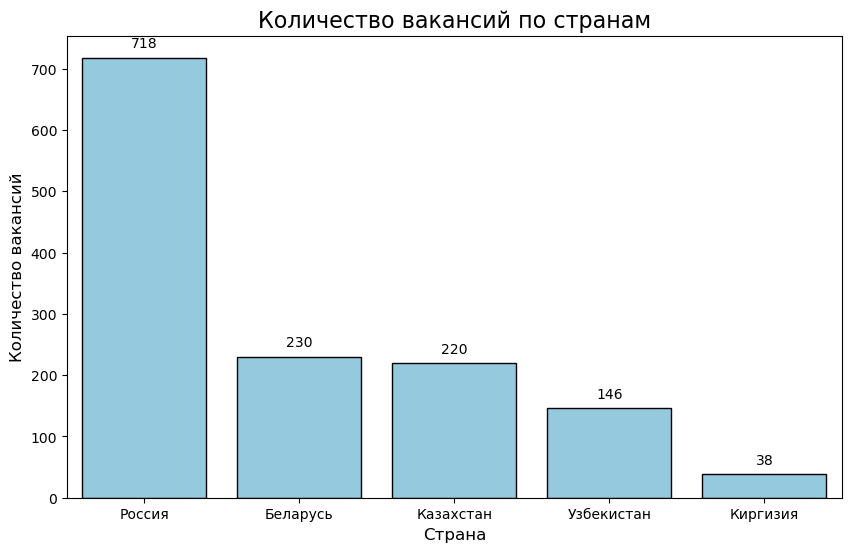

In [4]:
# Подсчет количества вакансий по странам
country_counts = df_final_load['Страна'].value_counts()

# Построение гистограммы
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, color='skyblue', edgecolor='black')

# Добавление чисел на столбцы
for p in ax.patches:
    height = int(p.get_height())  # Преобразование высоты в целое число
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Добавление меток осей и заголовка
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.title('Количество вакансий по странам', fontsize=16)

# Отображение гистограммы
plt.show()

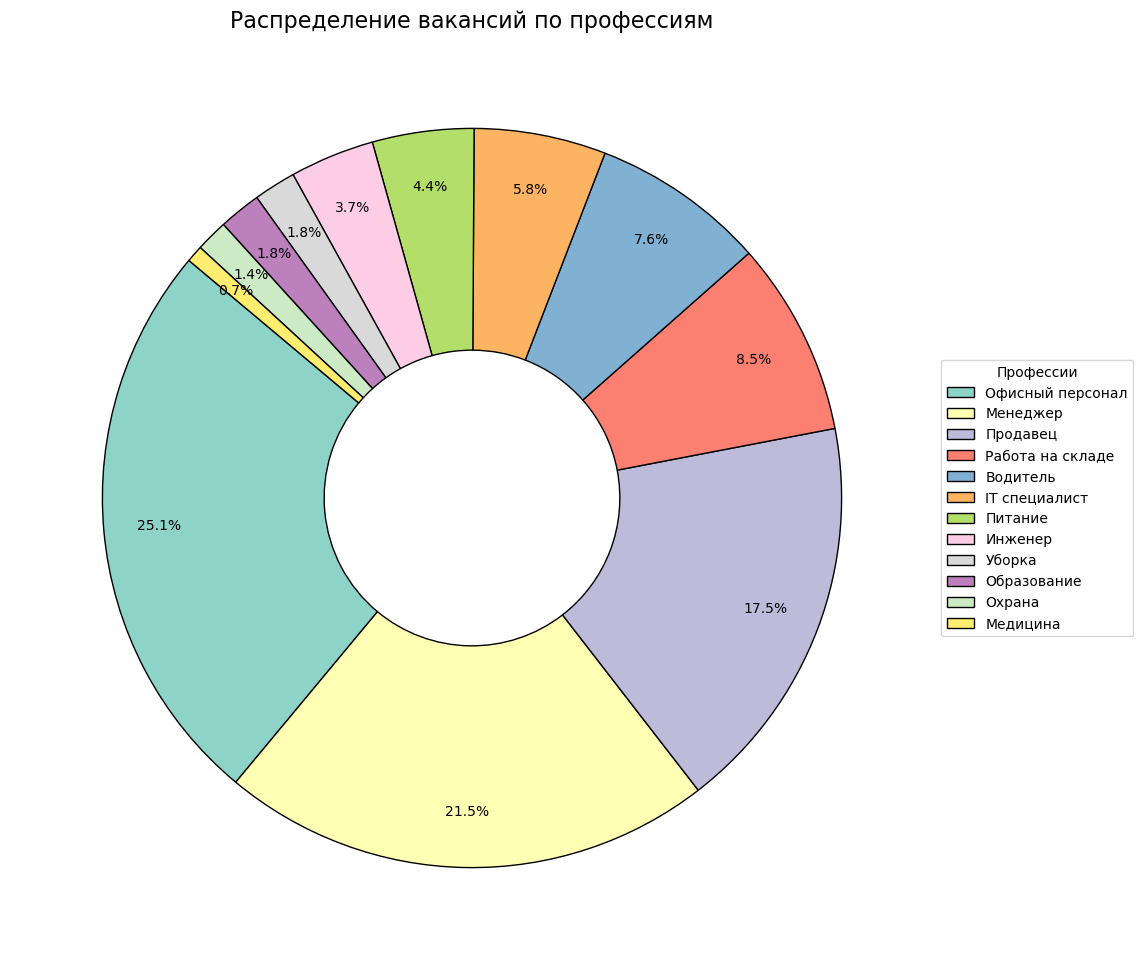

In [5]:
# Подсчет количества вакансий по профессиям
profession_counts = df_final_load['Должность'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(12, 12))  # Увеличиваем размер фигуры
wedges, texts, autotexts = plt.pie(profession_counts, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3(range(len(profession_counts))),
                                   wedgeprops=dict(width=0.6, edgecolor='k'),  # Устанавливаем черную обводку
                                   textprops=dict(fontsize=10), pctdistance=0.85, labels=None)  # Убираем подписи профессий на секторах


# Добавление легенды
plt.legend(wedges, profession_counts.index, title="Профессии", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Добавление заголовка
plt.title('Распределение вакансий по профессиям', fontsize=16)
plt.ylabel('')  # Убираем подпись оси

# Отображение диаграммы
plt.show()

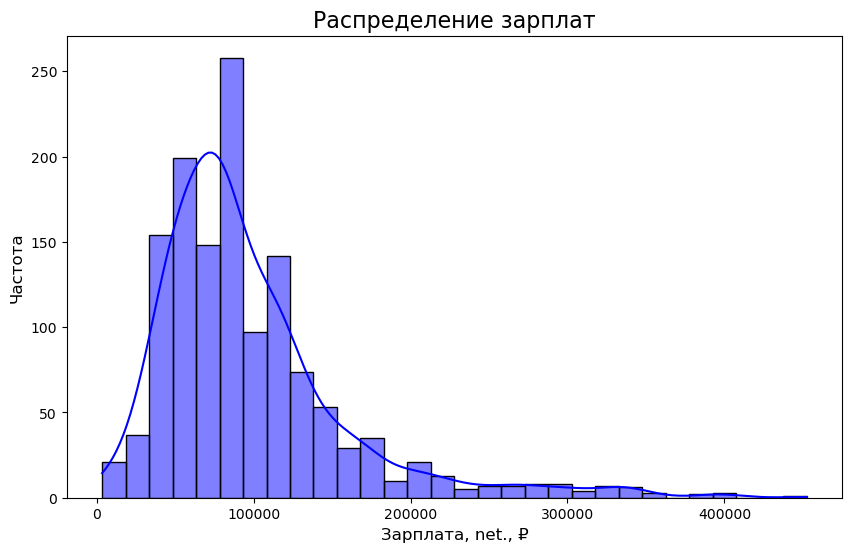

In [6]:
# 1. Гистограмма зарплат
plt.figure(figsize=(10, 6))
sns.histplot(df_final_load['Зарплата, net., ₽'], bins=30, kde=True, color='blue')
plt.title('Распределение зарплат', fontsize=16)
plt.xlabel('Зарплата, net., ₽', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

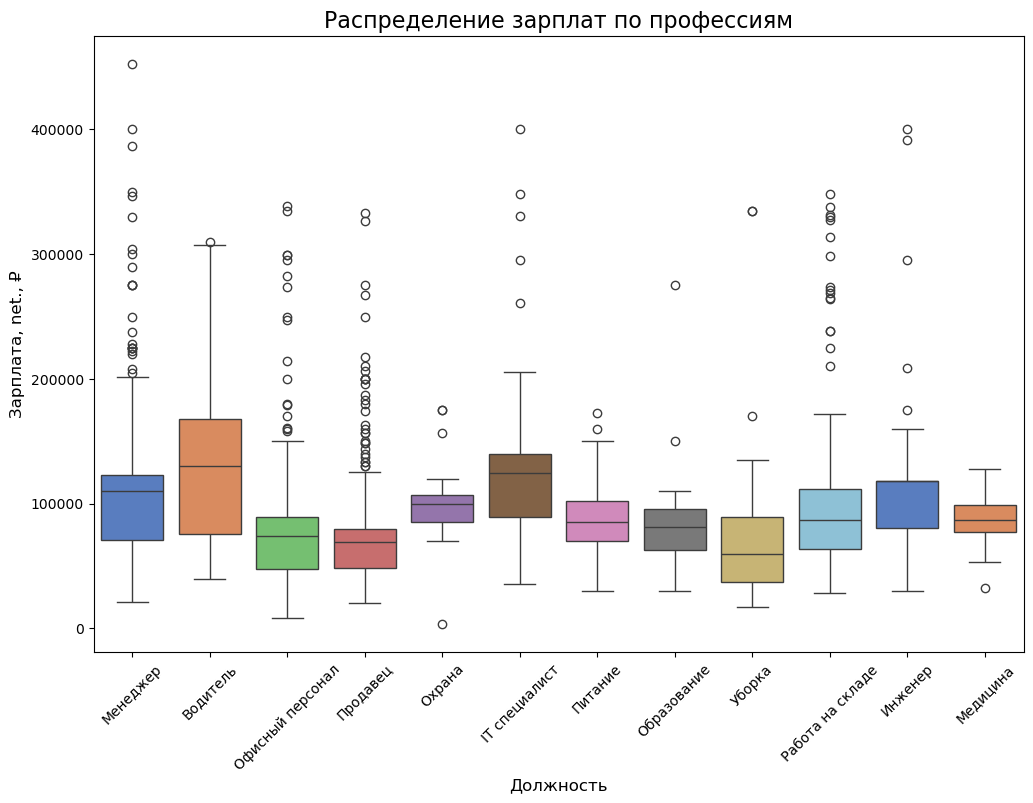

In [7]:
# Построение boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_final_load, x='Должность', y='Зарплата, net., ₽', hue='Должность', palette='muted', dodge=False)
plt.xticks(rotation=45)
plt.title('Распределение зарплат по профессиям', fontsize=16)
plt.xlabel('Должность', fontsize=12)
plt.ylabel('Зарплата, net., ₽', fontsize=12)
plt.legend([],[], frameon=False)  # Убираем легенду, так как она дублирует ось x
plt.show()

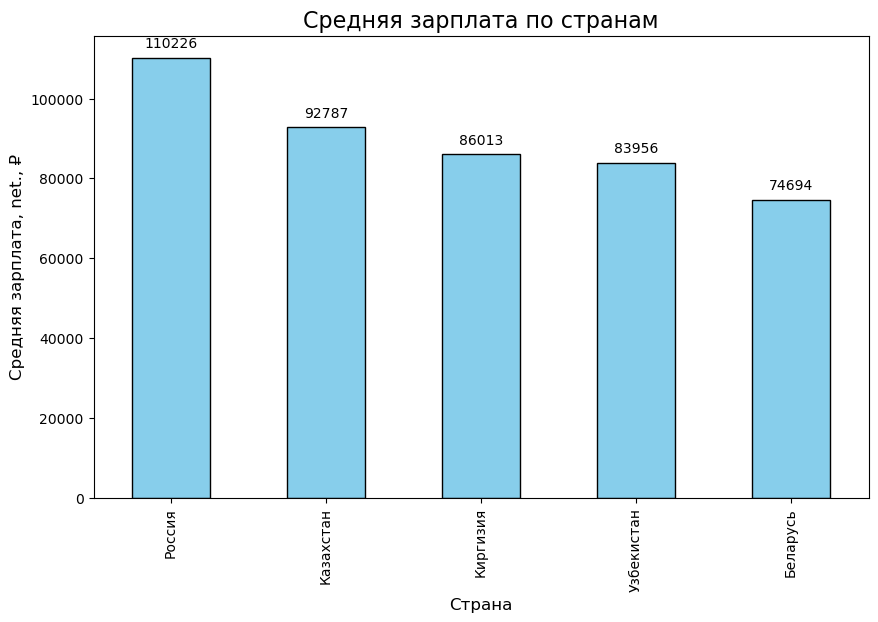

In [9]:
# Подсчет средней зарплаты по странам
mean_salary_by_country = df_final_load.groupby('Страна')['Зарплата, net., ₽'].mean().sort_values(ascending=False)

# Построение гистограммы
plt.figure(figsize=(10, 6))
bars = mean_salary_by_country.plot(kind='bar', color='skyblue', edgecolor='black')

# Добавление конкретных значений на гистограмму
for bar in bars.patches:
    yval = bar.get_height()
    plt.annotate(f'{int(yval)}',
                 (bar.get_x() + bar.get_width() / 2, yval),
                 ha='center', va='bottom',
                 fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Добавление заголовка и меток осей
plt.title('Средняя зарплата по странам', fontsize=16)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Средняя зарплата, net., ₽', fontsize=12)

# Отображение графика
plt.show()

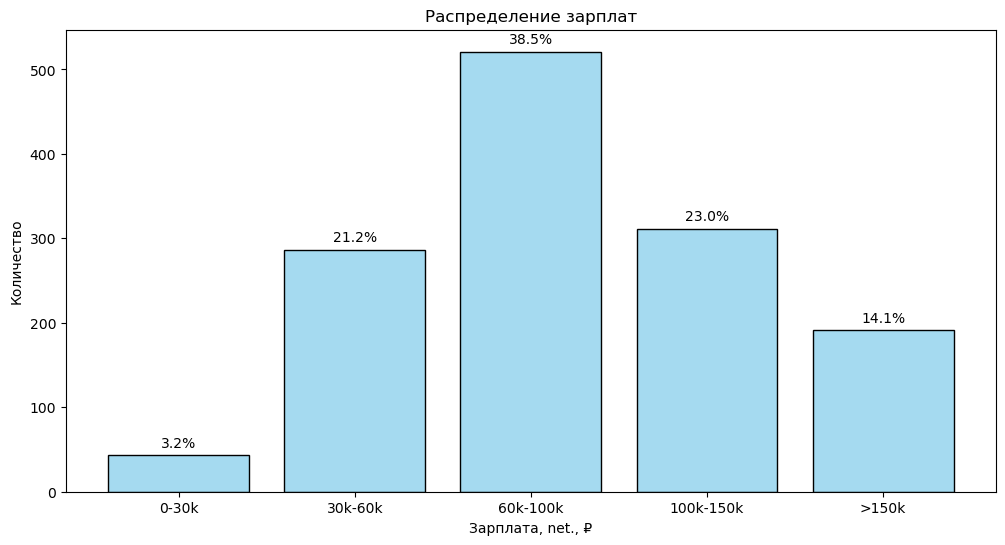

In [144]:
# Создаем бины
bins = [0, 30000, 60000, 100000, 150000, float('inf')]
labels = ['0-30k', '30k-60k', '60k-100k', '100k-150k', '>150k']

# Создаем новую колонку с бинами для визуализации
df_final_load['Зарплата_бины'] = pd.cut(df_final_load['Зарплата, net., ₽'], bins=bins, labels=labels, right=False)

# Подсчитываем количество зарплат в каждом бине
bin_counts = df_final_load['Зарплата_бины'].value_counts().sort_index()

# Подсчитываем общее количество зарплат
total_count = df_final_load.shape[0]

# Создаем гистограмму
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_final_load, x='Зарплата_бины', color='skyblue' ,discrete=(True, False), shrink=0.8)

# Добавляем метки осей и заголовок
plt.xlabel('Зарплата, net., ₽')
plt.ylabel('Количество')
plt.title('Распределение зарплат')

# Добавляем аннотации с процентом зарплат в каждом бине
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Отображаем гистограмму
plt.show()

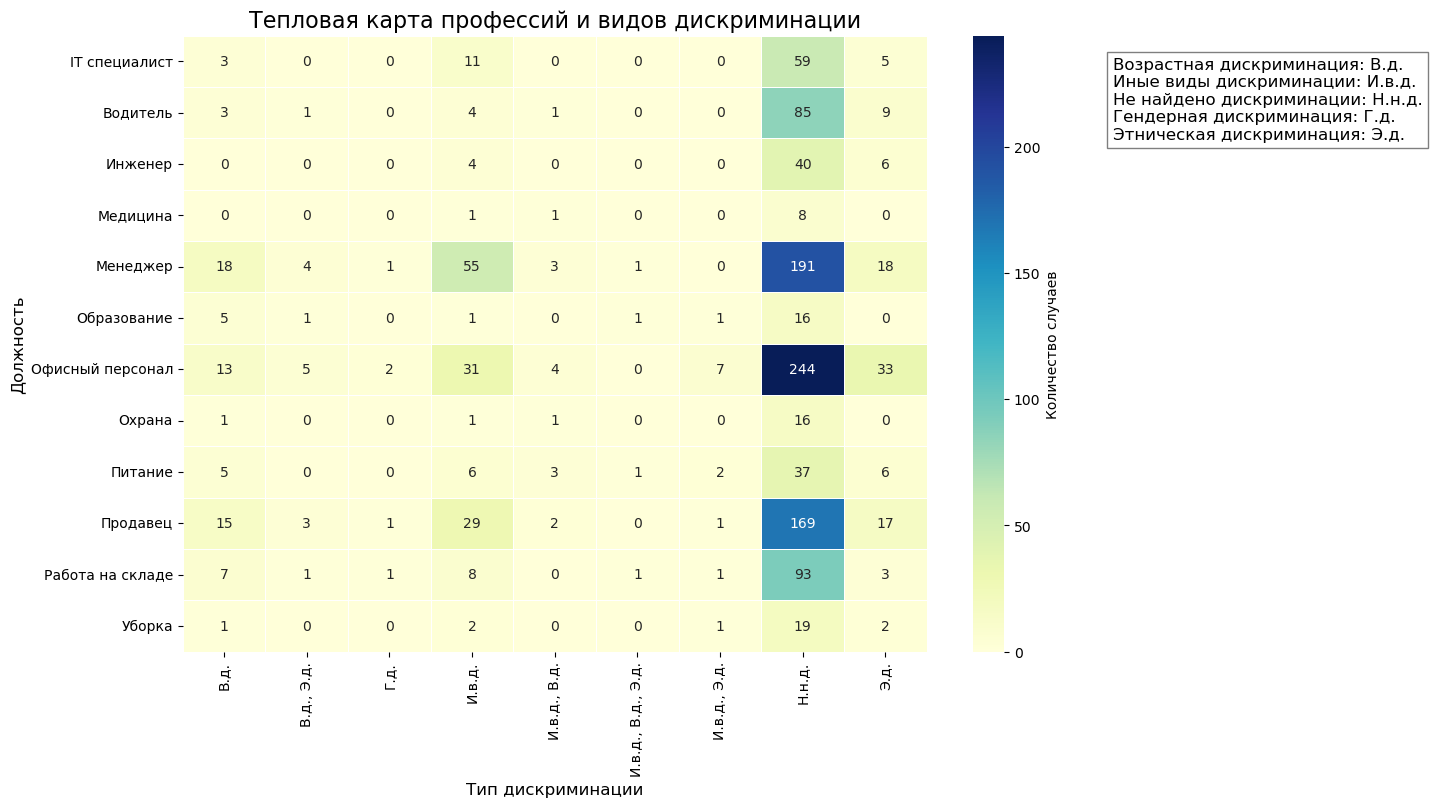

In [148]:
# Создание словаря для сопоставления полных названий с инициалами
discrimination_mapping = {
    'Возрастная дискриминация': 'В.д.',
    'Иные виды дискриминации': 'И.в.д.',
    'Не найдено дискриминации': 'Н.н.д.',
    'Гендерная дискриминация': 'Г.д.',
    'Этническая дискриминация': 'Э.д.'
}

# Функция для сокращения названий типов дискриминации
def shorten_discrimination_type(discrimination_type):
    types = discrimination_type.split(', ')
    shortened_types = [discrimination_mapping[t.strip()] for t in types]
    return ', '.join(shortened_types)

# Создание новой колонки с сокращенными названиями
df_final_load['Сокращенный вид дискриминации'] = df_final_load['Вид дискриминации'].apply(shorten_discrimination_type)

# Создание сводной таблицы
pivot_table = pd.crosstab(df_final_load['Должность'], df_final_load['Сокращенный вид дискриминации'])

# Построение тепловой карты
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Количество случаев'})

# Добавление легенды слева с объяснением инициалов
legend_labels = [f"{full}: {short}" for full, short in discrimination_mapping.items()]
ax.figure.text(0.9, 0.8, "\n".join(legend_labels), fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# Добавление заголовка и меток осей
plt.title('Тепловая карта профессий и видов дискриминации', fontsize=16)
plt.xlabel('Тип дискриминации', fontsize=12)
plt.ylabel('Должность', fontsize=12)

# Отображение графика
plt.show()

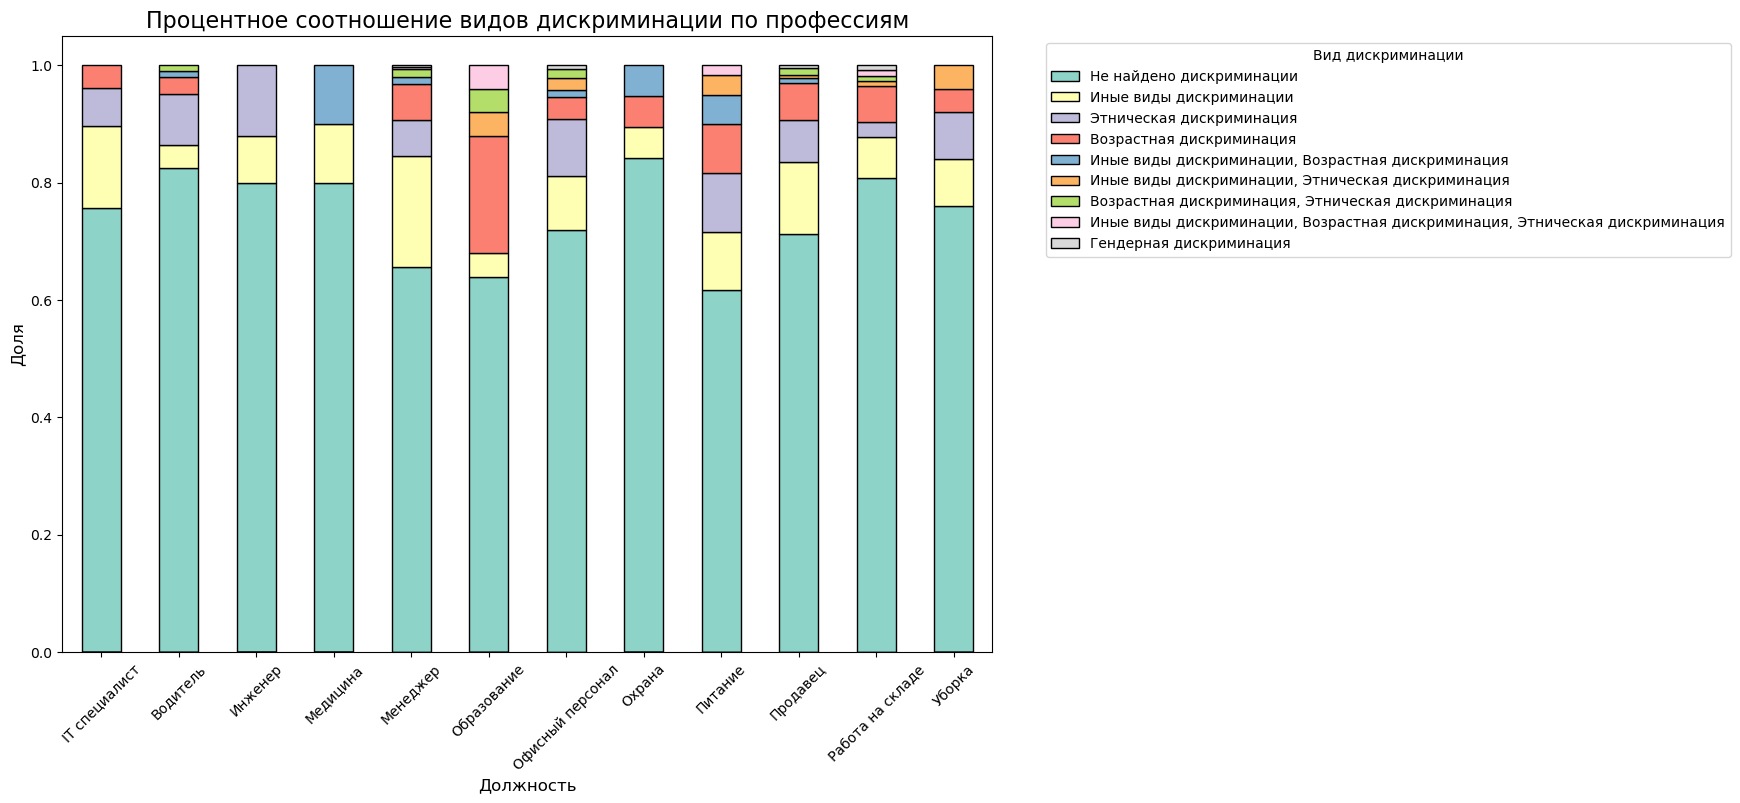

In [149]:
# Создание сводной таблицы
pivot_stacked = pd.crosstab(df_final_load['Должность'], df_final_load['Вид дискриминации'], normalize='index')

# Сортировка столбцов по возрастанию значений
sorted_columns = pivot_stacked.sum().sort_values(ascending=False).index
pivot_stacked = pivot_stacked[sorted_columns]

# Построение диаграммы
ax = pivot_stacked.plot(kind='bar', stacked=True, figsize=(12, 8), color=plt.cm.Set3(range(len(pivot_stacked.columns))), edgecolor='black')

# Настройка заголовка и меток
plt.title('Процентное соотношение видов дискриминации по профессиям', fontsize=16)
plt.xlabel('Должность', fontsize=12)
plt.ylabel('Доля', fontsize=12)
plt.legend(title='Вид дискриминации', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Отображение диаграммы
plt.show()

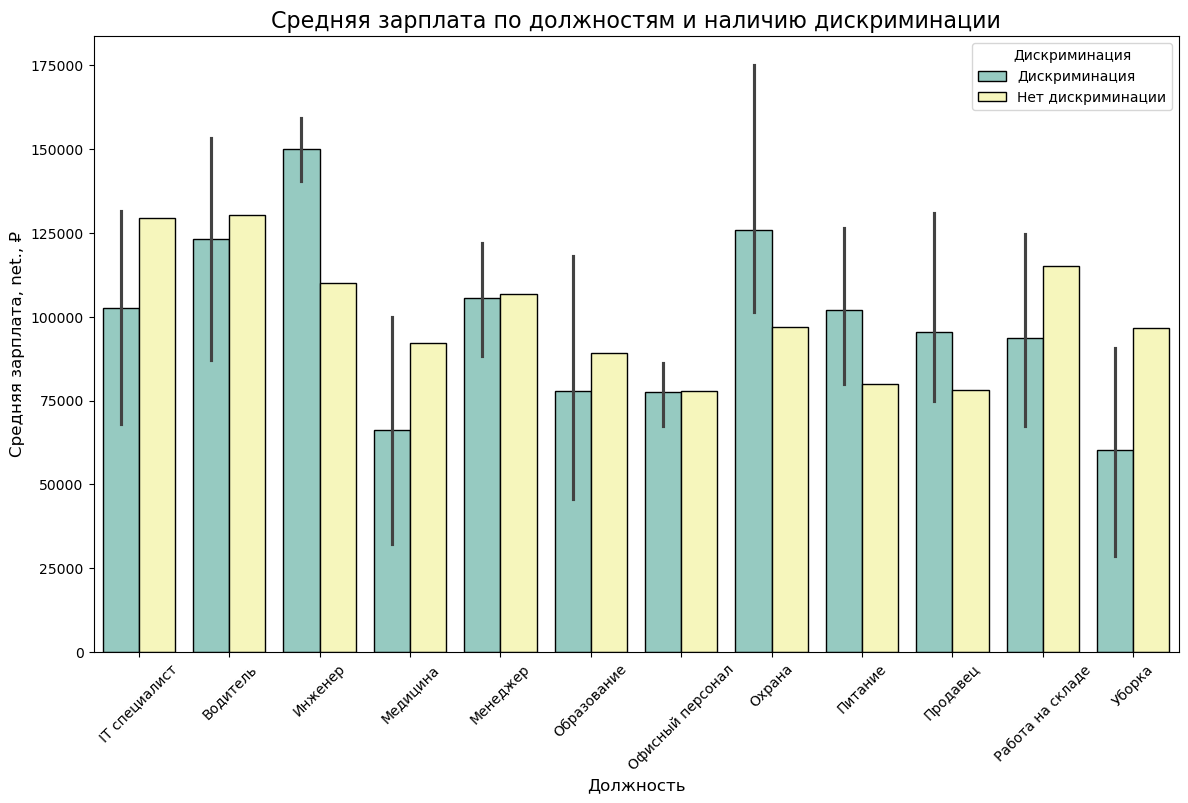

In [25]:
# Группировка данных по должности и наличию дискриминации
grouped = df_final_load.groupby(['Должность', 'Вид дискриминации'])['Зарплата, net., ₽'].mean().reset_index()

# Переименование столбцов для удобства
grouped = grouped.rename(columns={'Вид дискриминации': 'Дискриминация'})

# Замена значений для удобства отображения
grouped['Дискриминация'] = grouped['Дискриминация'].apply(lambda x: 'Дискриминация' if x != 'Не найдено дискриминации' else 'Нет дискриминации')


# Построение группированной столбчатой диаграммы
plt.figure(figsize=(14, 8))
sns.barplot(x='Должность', y='Зарплата, net., ₽', hue='Дискриминация', data=grouped, palette=sns.color_palette("Set3", 2), edgecolor='black')

# Настройка заголовка и меток
plt.title('Средняя зарплата по должностям и наличию дискриминации', fontsize=16)
plt.xlabel('Должность', fontsize=12)
plt.ylabel('Средняя зарплата, net., ₽', fontsize=12)
plt.legend(title='Дискриминация', loc='upper right')
plt.xticks(rotation=45)

# Отображение диаграммы
plt.show()

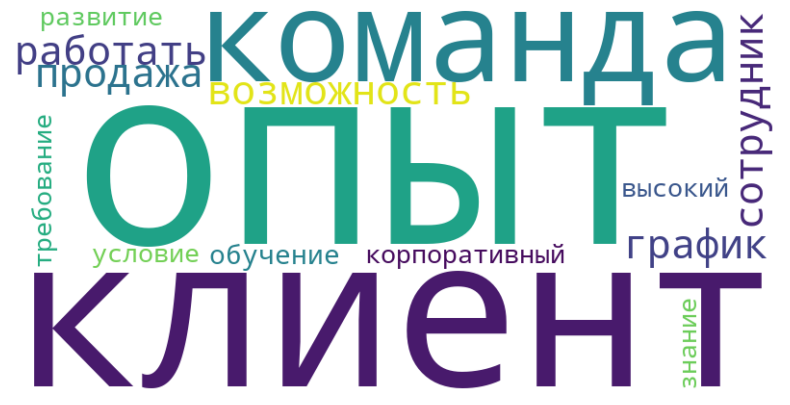

Топ-15 слов и их частоты:
опыт: 587
клиент: 451
команда: 437
работать: 354
сотрудник: 345
продажа: 328
график: 324
возможность: 312
обучение: 306
корпоративный: 255
требование: 251
знание: 242
условие: 241
высокий: 240
развитие: 227


In [163]:
# Фильтруем строки, где 'Вид дискриминации' не равно 'Не найдено дискриминации'
filtered_df = df_final_load[df_final_load['Вид дискриминации'] != 'Не найдено дискриминации']

# Объединяем все строки в колонке 'Описание (preProcess)' в одну большую строку
all_text = ' '.join(filtered_df['Описание (preProcess)'])

# Создаем список слов
words = all_text.replace(',', ' ').split()

# Список слов для исключения
exclude_words = {'работа', 'компания', 'наш', 'год', 'день'}

# Фильтруем слова, исключая те, которые находятся в списке exclude_words
filtered_words = [word for word in words if word not in exclude_words]

# Подсчитываем частоту каждого слова
word_counts = Counter(filtered_words)

# Получаем топ-15 слов
top_15_words = word_counts.most_common(15)

# Создаем строку с топ-15 словами
top_15_text = ' '.join([word for word, count in top_15_words])

# Создаем облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_15_text)

# Отображаем облако слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Выводим топ-15 слов и их частоты
print("Топ-15 слов и их частоты:")
for word, count in top_15_words:
    print(f"{word}: {count}")

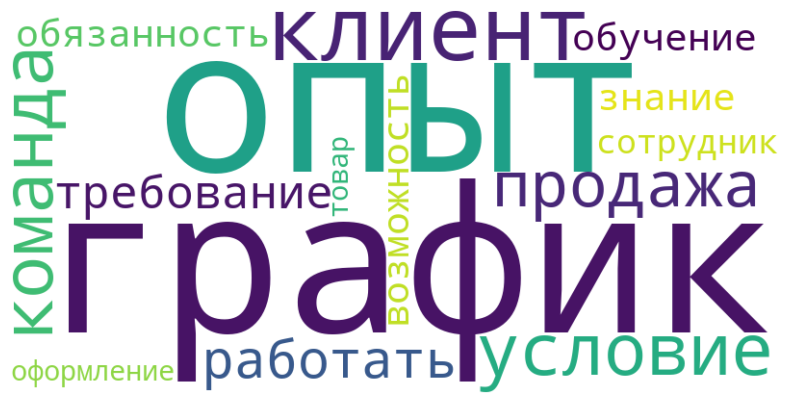

Топ-15 слов и их частоты:
опыт: 1100
график: 808
клиент: 739
условие: 706
команда: 693
продажа: 667
работать: 624
требование: 621
обязанность: 583
возможность: 559
обучение: 518
знание: 504
сотрудник: 497
оформление: 462
товар: 402


In [164]:
# Фильтруем строки, где 'Вид дискриминации' не равно 'Не найдено дискриминации'
filtered_df = df_final_load[df_final_load['Вид дискриминации'] == 'Не найдено дискриминации']

# Объединяем все строки в колонке 'Описание (preProcess)' в одну большую строку
all_text = ' '.join(filtered_df['Описание (preProcess)'])

# Создаем список слов
words = all_text.replace(',', ' ').split()

# Список слов для исключения
exclude_words = {'работа', 'компания', 'наш', 'год', 'день'}

# Фильтруем слова, исключая те, которые находятся в списке exclude_words
filtered_words = [word for word in words if word not in exclude_words]

# Подсчитываем частоту каждого слова
word_counts = Counter(filtered_words)

# Получаем топ-15 слов
top_15_words = word_counts.most_common(15)

# Создаем строку с топ-15 словами
top_15_text = ' '.join([word for word, count in top_15_words])

# Создаем облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_15_text)

# Отображаем облако слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Выводим топ-15 слов и их частоты
print("Топ-15 слов и их частоты:")
for word, count in top_15_words:
    print(f"{word}: {count}")

In [169]:
df_final_load['Вид дискриминации'].value_counts()

Вид дискриминации
Не найдено дискриминации                                                       977
Иные виды дискриминации                                                        153
Этническая дискриминация                                                        99
Возрастная дискриминация                                                        71
Возрастная дискриминация, Этническая дискриминация                              15
Иные виды дискриминации, Возрастная дискриминация                               15
Иные виды дискриминации, Этническая дискриминация                               13
Гендерная дискриминация                                                          5
Иные виды дискриминации, Возрастная дискриминация, Этническая дискриминация      4
Name: count, dtype: int64

In [ ]:
# Фильтруем строки, где 'Вид дискриминации' равно 'Не найдено дискриминации' и в 'Описание (preProcess)' есть слово 'женский'
filtered_df = df_final_load[
    (df_final_load['Вид дискриминации'] == 'Не найдено дискриминации') &
    df_final_load['Описание (preProcess)'].str.contains('одежда', case=False, na=False)
]

# Выводим только полное описание из колонки 'Описание (preProcess)'
descriptions = filtered_df['Описание'].to_list()

# Выводим результат
for description in descriptions:
    print(description)